In [25]:
# importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Select relevant features & drop missing values
df = df[["age", "fare", "pclass", "sex", "survived"]].dropna()

# Convert categorical variables into numerical (sex: male=0, female=1)
df["sex"] = df["sex"].map({"male": 0, "female": 1})

df.head()


,age,fare,pclass,sex,survived
0,22.0,7.2500,3,0,0
1,38.0,71.2833,1,1,1
2,26.0,7.9250,3,1,1
3,35.0,53.1000,1,1,1
4,35.0,8.0500,3,0,0


In [26]:
# Data preparation
# Define Features (X) and Target (y)
X = df[["age", "fare", "pclass", "sex"]]  # Features
y = df["survived"]  # Target (1 = survived, 0 = not survived)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
#  Train a Random Forest Model
# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.79


In [28]:
# results
# Print Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.80      0.87      0.84        87
           1       0.77      0.66      0.71        56

    accuracy                           0.79       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.79      0.79       143

Confusion Matrix:
 [[76 11]
 [19 37]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_30756\2358829908.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


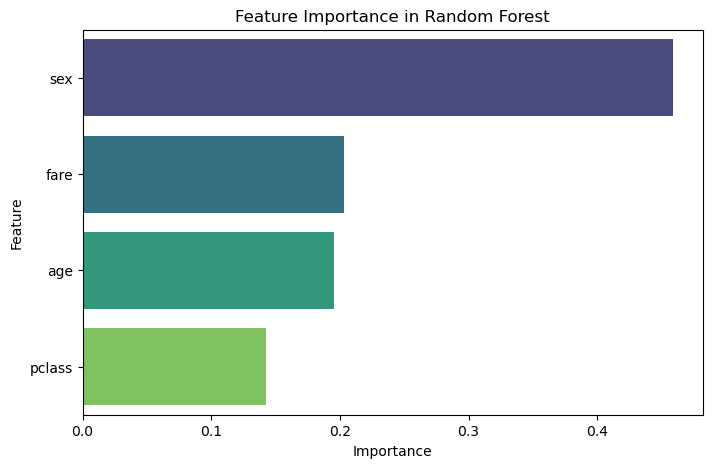

In [29]:
# feature importannce
# Get feature importance
importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()


In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = sns.load_dataset("penguins")
df.head()

# Step 2: Handle missing values
# Step 3: Convert categorical variables to numerical
# Step 4: Split data into train and test sets
# Step 5: Train a Random Forest model
# Step 6: Make predictions and evaluate accuracy
# Step 7: Identify feature importance


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [31]:
# Step 2: Handle missing values
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
# Step 3: Convert categorical variables to numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [35]:
# Drop rows with missing values
df = df.dropna()

# Convert categorical variables to numerical
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})
df["island"] = df["island"].astype("category").cat.codes
df["species"] = df["species"].astype("category").cat.codes

# Correctly split data into X (features) and y (target)
X = df.drop(columns=["species"])  # Features
y = df["species"]  # Target

# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
 #Step 5: Train a Random Forest model
# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [37]:
# Print Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_30756\2358829908.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


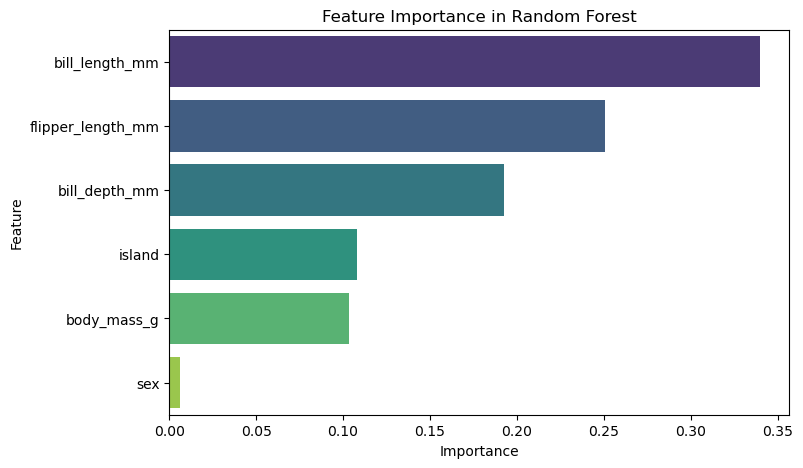

In [38]:
# feature importannce
# Get feature importance
importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()
